### 具体流程

![GEyICF.png](https://s1.ax1x.com/2020/03/29/GEyICF.png)

###  读取数据

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt


# 读取数据，pd.read_csv默认生成DataFrame对象，需将其转换成Series对象
reader = pd.read_csv('dpc-covid19-ita-andamento-nazionale.csv', encoding='utf-8', index_col='data',squeeze=True)
reader = reader.dropna()
reader.index = pd.to_datetime(reader.index)

### 主线：数据平稳化

#### 定义单位根检验的函数

拿到时间序列数据后，要进行平稳性检验，主要有两种方法：肉眼检验法和单位根检验法。

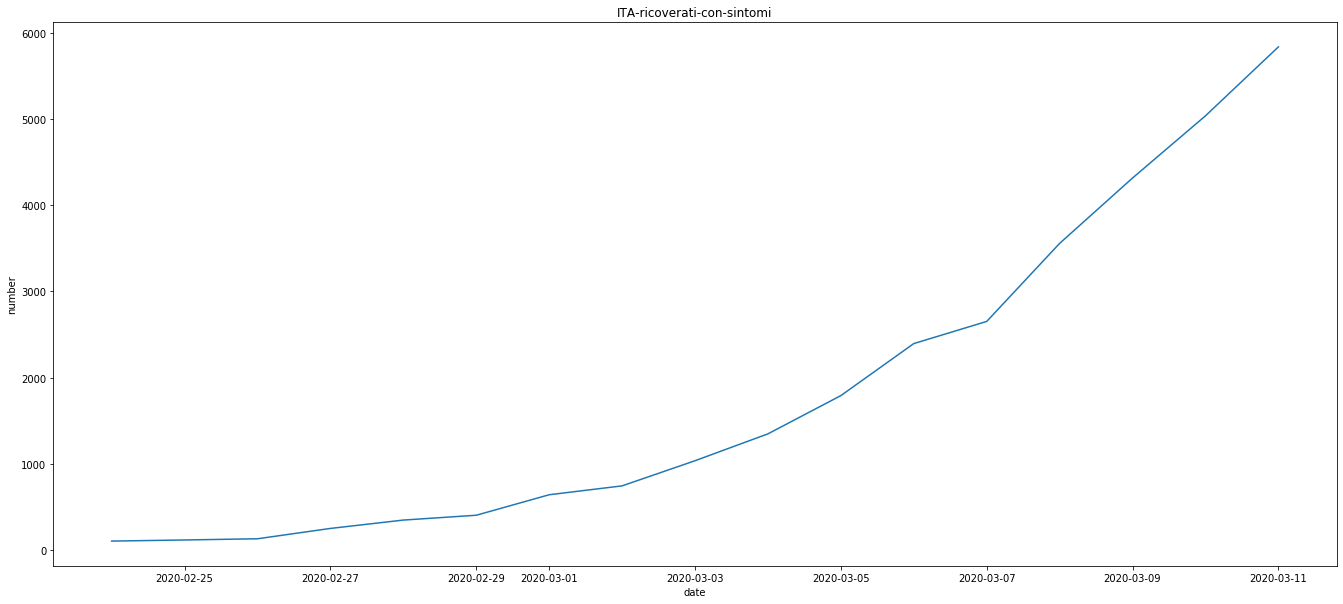

In [3]:
sub = reader[ '2020-02-24': '2020-03-14']

train = sub.loc[ '2020-02-24': '2020-03-11']
test = sub.loc[ '2020-03-12': '2020-03-14']


plt.figure(figsize=( 23, 10))
plt.plot(train)
plt.title('ITA-ricoverati-con-sintomi')
plt.xlabel('date')
plt.ylabel('number')
plt.show()
# comp = pd.DataFrame()
# comp['ricoverati_con_sintomi'] = train
# comp.plot()

#### 平稳性检测

In [4]:
import statsmodels.tsa.stattools as ts

result = ts.adfuller(train)
print(train)
print(result)

data
2020-02-24     101
2020-02-25     114
2020-02-26     128
2020-02-27     248
2020-02-28     345
2020-02-29     401
2020-03-01     639
2020-03-02     742
2020-03-03    1034
2020-03-04    1346
2020-03-05    1790
2020-03-06    2394
2020-03-07    2651
2020-03-08    3557
2020-03-09    4316
2020-03-10    5038
2020-03-11    5838
Name: ricoverati_con_sintomi, dtype: int64
(-2.038389079459057, 0.26999851020347665, 5, 11, {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}, 129.56497604064944)


返回值依次为：adf, pvalue p值， usedlag, nobs, critical values临界值 , icbest, regresults, resstore。 ADF 分别大于3中不同检验水平的3个临界值，单位检测统计量对应的p 值显著大于 0.05 ， 说明序列可以判定为 非平稳序列

#### 画出自相关性图

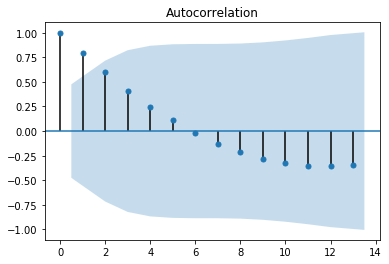

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train)
plt.show()

#### 支线：尝试平滑法处理

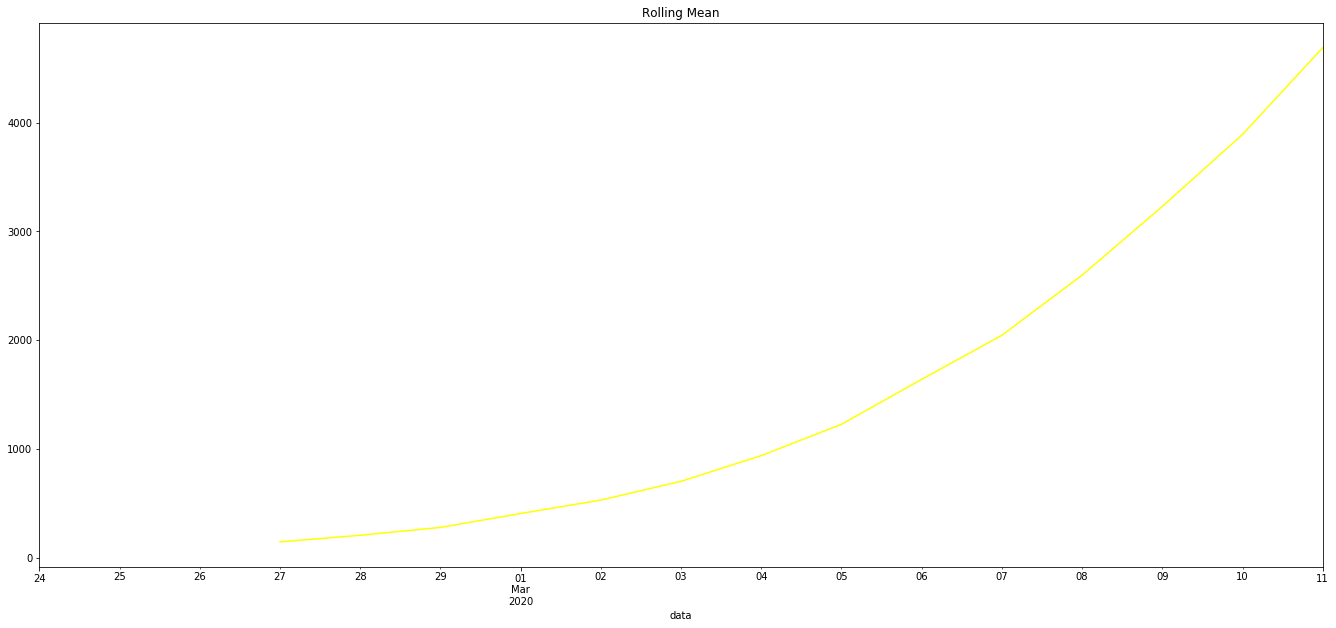

In [6]:
#滚动平均（平滑法不平稳处理）
rolmean = train.rolling(window=4,center = False).mean()

rolmean.plot(color = 'yellow',title='Rolling Mean',figsize=(23,10))

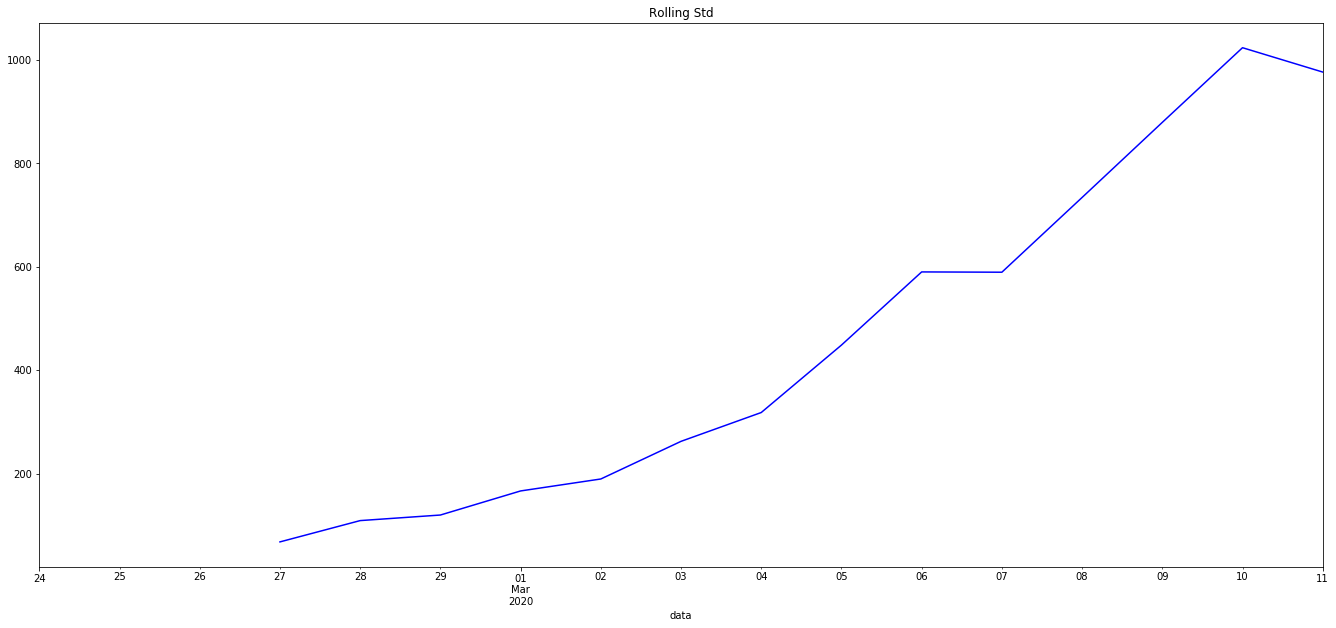

In [7]:
#滚动标准差
rolstd = train.rolling(window=4,center = False).std()

rolstd.plot(color = 'blue',title='Rolling Std',figsize=(23,10))

#### 主线：对数据进行差分后得到自相关图和偏相关图

log

data
2020-02-24    4.615121
2020-02-25    4.736198
2020-02-26    4.852030
2020-02-27    5.513429
2020-02-28    5.843544
2020-02-29    5.993961
2020-03-01    6.459904
2020-03-02    6.609349
2020-03-03    6.941190
2020-03-04    7.204893
2020-03-05    7.489971
2020-03-06    7.780721
2020-03-07    7.882692
2020-03-08    8.176673
2020-03-09    8.370084
2020-03-10    8.524764
2020-03-11    8.672144
Name: ricoverati_con_sintomi, dtype: float64
(-1.8954169951509239, 0.3342201629616346, 1, 15, {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}, -25.871721774771743)


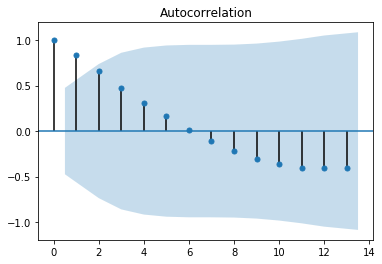

D:\anaconda\insall\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


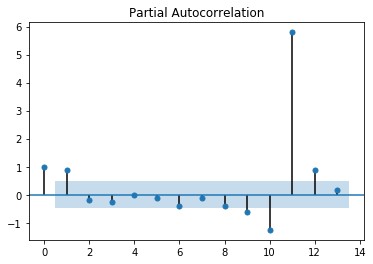

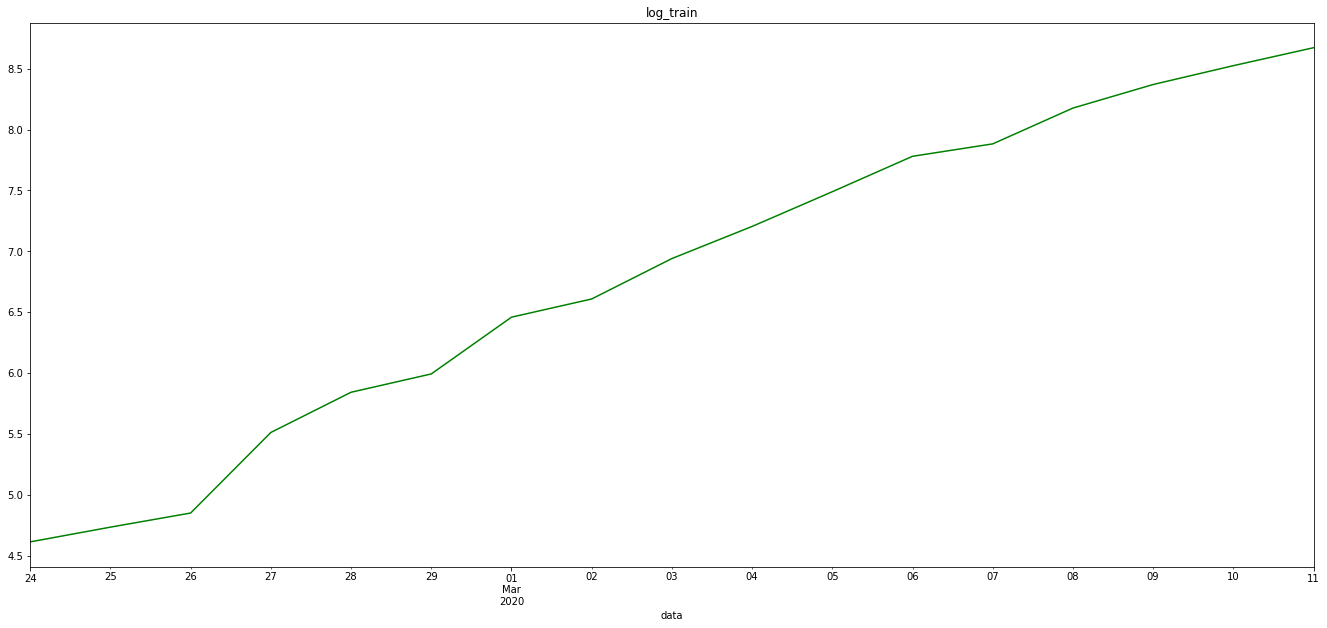

In [8]:
log_train = np.log(train)
print(log_train)

result = ts.adfuller(log_train)
print(result)

plot_acf(log_train) #画出自相关图
plt.show()

plot_pacf(log_train)   #画出偏相关图
plt.show()

log_train.plot(color = 'green',title='log_train',figsize=(23,10))

一阶差分

data
2020-02-25    0.121078
2020-02-26    0.115832
2020-02-27    0.661398
2020-02-28    0.330116
2020-02-29    0.150417
2020-03-01    0.465943
2020-03-02    0.149445
2020-03-03    0.331841
2020-03-04    0.263702
2020-03-05    0.285078
2020-03-06    0.290750
2020-03-07    0.101971
2020-03-08    0.293981
2020-03-09    0.193412
2020-03-10    0.154680
2020-03-11    0.147379
Name: ricoverati_con_sintomi, dtype: float64
(89.7247745891786, 1.0, 6, 9, {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}, -106.17130619357985)


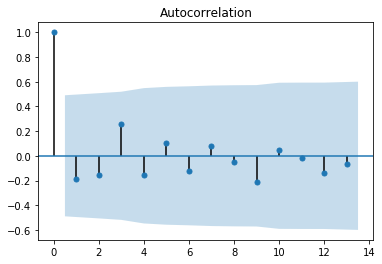

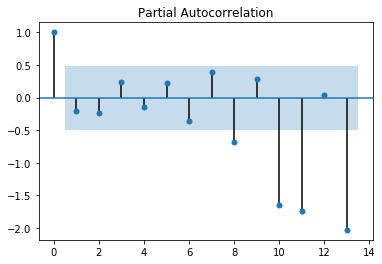

In [9]:
from numpy import nan as NaN

diff_log_train = log_train.diff().dropna()
print(diff_log_train)


result = ts.adfuller(diff_log_train)
print(result)

plot_acf(diff_log_train) #画出自相关图
plt.show()

plot_pacf(diff_log_train)   #画出偏相关图
plt.show()

二阶差分

data
2020-02-26   -0.005246
2020-02-27    0.545567
2020-02-28   -0.331283
2020-02-29   -0.179699
2020-03-01    0.315526
2020-03-02   -0.316498
2020-03-03    0.182396
2020-03-04   -0.068138
2020-03-05    0.021376
2020-03-06    0.005672
2020-03-07   -0.188779
2020-03-08    0.192009
2020-03-09   -0.100569
2020-03-10   -0.038731
2020-03-11   -0.007301
Name: ricoverati_con_sintomi, dtype: float64
(-3.1859407359894867, 0.020813044589870443, 5, 9, {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}, -27.228743678695153)


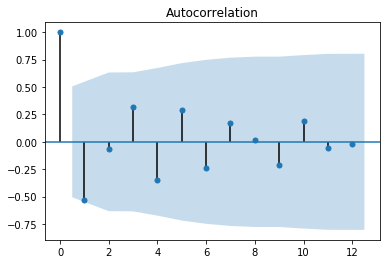

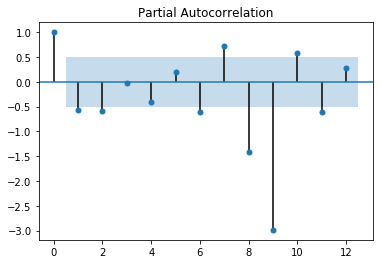

In [10]:
diff2_log_train = diff_log_train.diff().dropna()
print(diff2_log_train)


result = ts.adfuller(diff2_log_train)
print(result)

plot_acf(diff2_log_train) #画出自相关图
plt.show()

plot_pacf(diff2_log_train)   #画出偏相关图
plt.show()

二阶差分后的序列的时序图在均值附近比较平稳的波动， 自相关性有很强的短期相关性， 单位根检验 p值小于 0.05 ，所以说二阶差分后的序列是平稳序列

data
2020-02-26   -0.005246
2020-02-27    0.545567
2020-02-28   -0.331283
2020-02-29   -0.179699
2020-03-01    0.315526
2020-03-02   -0.316498
2020-03-03    0.182396
2020-03-04   -0.068138
2020-03-05    0.021376
2020-03-06    0.005672
2020-03-07   -0.188779
2020-03-08    0.192009
2020-03-09   -0.100569
2020-03-10   -0.038731
2020-03-11   -0.007301
Name: ricoverati_con_sintomi, dtype: float64


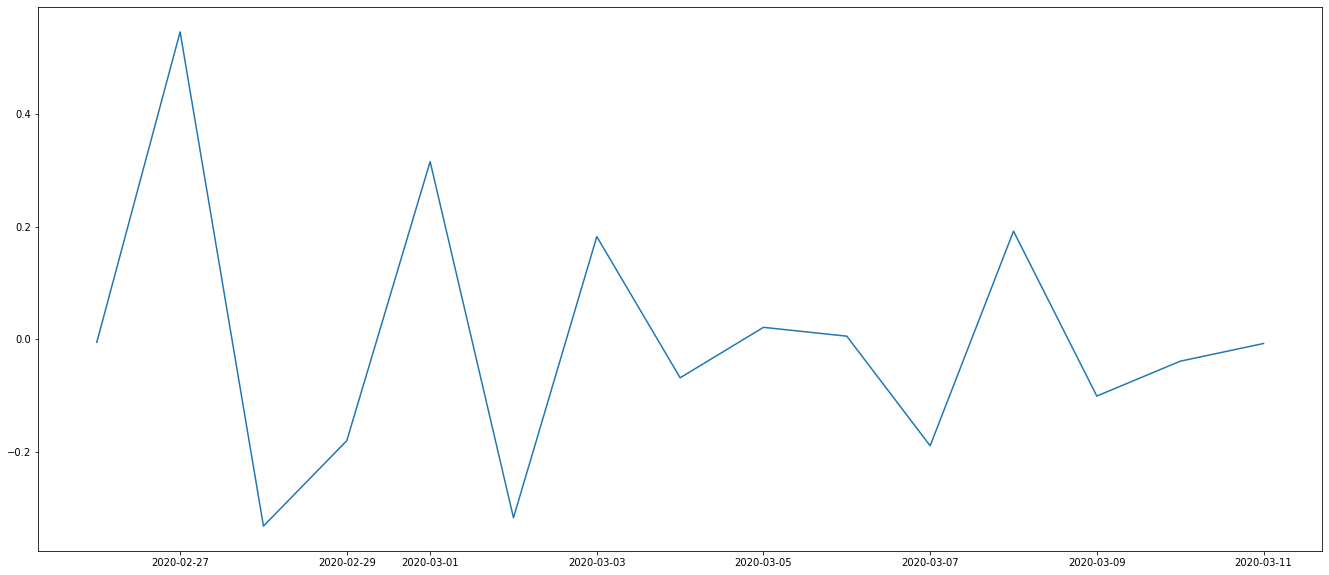

In [11]:
print(diff2_log_train)
plt.figure(figsize=( 23, 10))
plt.plot(diff2_log_train)
plt.show()

#### 对处理后的序列做白噪声检验

In [12]:
from statsmodels.stats.diagnostic import acorr_ljungbox

result = acorr_ljungbox(diff2_log_train, lags=1)
print('差分序列的白噪声检验结果：', result)

差分序列的白噪声检验结果： (array([5.13674383]), array([0.02342454]))


统计量的P值小于显著性水平0.05，则可以以95%的置信水平拒绝原假设，认为序列为非白噪声序列

### 定阶

### 模型检验

#### 这里的模型检验主要有两个：

1）检验参数估计的显著性（t检验）

2）检验残差序列的随机性，即残差之间是独立的

残差序列的随机性可以通过自相关函数法来检验，即做残差的自相关函数图：

D:\anaconda\insall\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda\insall\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<Figure size 1656x720 with 0 Axes>

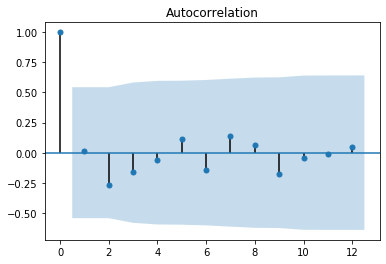

In [13]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.api import qqplot
import statsmodels.api as sm

# 模型阶次(3,2)来建立ARMA模型，最后3个数据用于预测。
order = (3, 2, 0)
model = ARIMA(diff2_log_train,order)
model = model.fit()

resid = model.resid #赋值
fig = plt.figure(figsize=(23, 10))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze())
plt.show()

## 模型预测

预测主要有两个函数，一个是predict函数，一个是forecast函数，predict中进行预测的时间段必须在我们训练ARIMA模型的数据中，forecast则是对训练数据集末尾下一个时间段的值进行预估

### 预测已有数据并验证

In [41]:
predict_sunspots = model.predict(start=str('2020-03-12'),end=str('2020-03-17'),dynamic=True)
print(predict_sunspots)

2020-03-12   -0.163872
2020-03-13    0.229179
2020-03-14   -0.112143
2020-03-15   -0.027624
2020-03-16    0.153576
2020-03-17   -0.140325
Freq: D, dtype: float64


#### 将平滑后的数据还原

In [42]:
data_restored2_1 = pd.Series([diff_log_train[0]], index=[train.index[1]]) .append(diff2_log_train).append(predict_sunspots)
data_restored2_2 = np.cumsum(data_restored2_1)
print(data_restored2_2)

data_restored1_1 = pd.Series([log_train[0]], index=[train.index[0]]) .append(data_restored2_2)
data_restored1_2 = np.cumsum(data_restored1_1)
# print(data_restored1_2)

data_restored = np.exp(data_restored1_2)
print(data_restored)

2020-02-25    0.121078
2020-02-26    0.115832
2020-02-27    0.661398
2020-02-28    0.330116
2020-02-29    0.150417
2020-03-01    0.465943
2020-03-02    0.149445
2020-03-03    0.331841
2020-03-04    0.263702
2020-03-05    0.285078
2020-03-06    0.290750
2020-03-07    0.101971
2020-03-08    0.293981
2020-03-09    0.193412
2020-03-10    0.154680
2020-03-11    0.147379
2020-03-12   -0.016493
2020-03-13    0.212686
2020-03-14    0.100543
2020-03-15    0.072919
2020-03-16    0.226495
2020-03-17    0.086170
dtype: float64
2020-02-24      101.000000
2020-02-25      114.000000
2020-02-26      128.000000
2020-02-27      248.000000
2020-02-28      345.000000
2020-02-29      401.000000
2020-03-01      639.000000
2020-03-02      742.000000
2020-03-03     1034.000000
2020-03-04     1346.000000
2020-03-05     1790.000000
2020-03-06     2394.000000
2020-03-07     2651.000000
2020-03-08     3557.000000
2020-03-09     4316.000000
2020-03-10     5038.000000
2020-03-11     5838.000000
2020-03-12     5742.

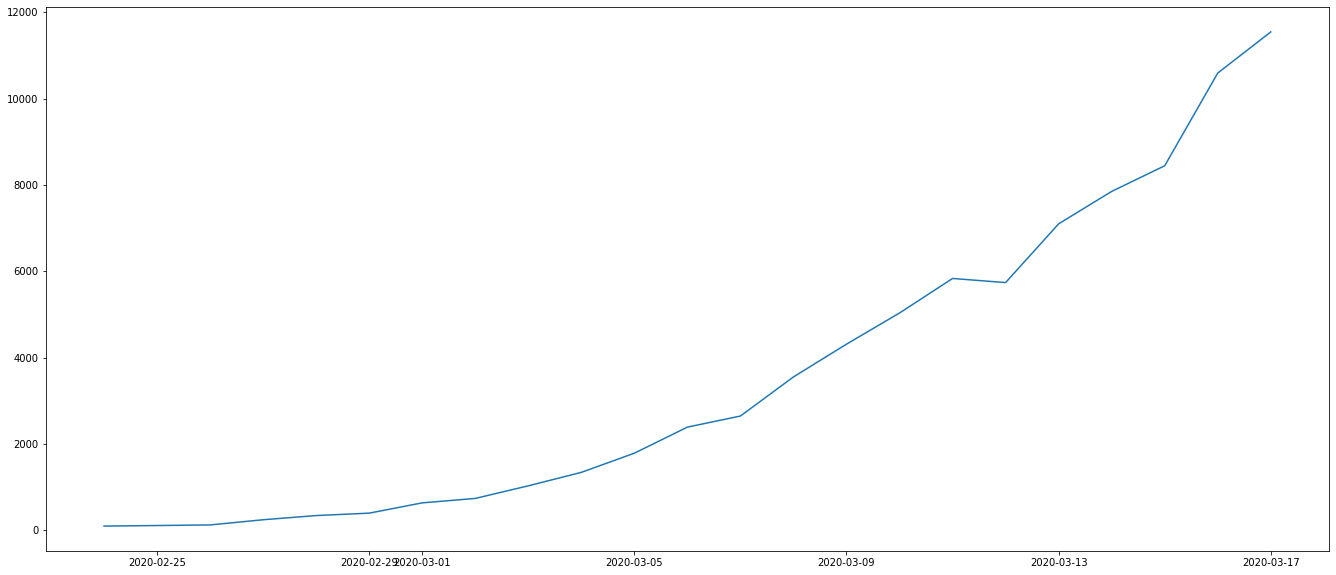

In [43]:
plt.figure(figsize=( 23, 10))
plt.plot(data_restored)
plt.show()

#### 与原始数据比较

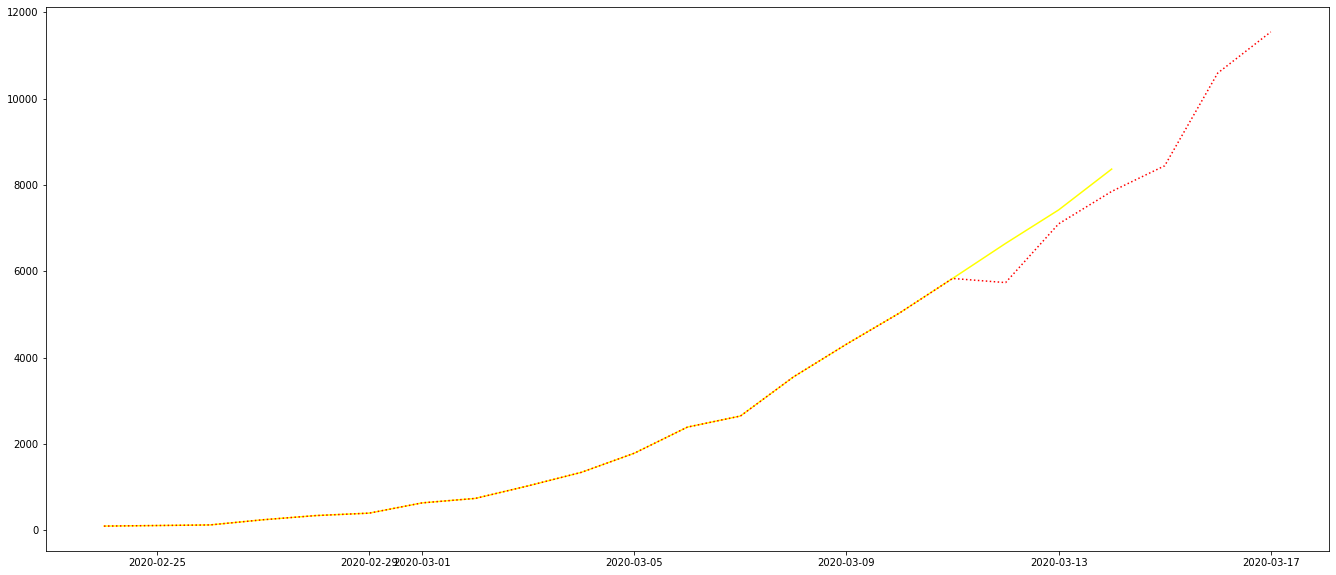

In [47]:
plt.figure(figsize=( 23, 10))
plt.plot(sub, label='original', color = 'yellow', linestyle='-')
plt.plot(data_restored, label='predict', color = 'red', linestyle=':')
plt.show()

In [45]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: ARIMA
===============================================================================
Model:                ARIMA                     BIC:                 17.0082   
Dependent Variable:   D2.ricoverati_con_sintomi Log-Likelihood:      -2.0917   
Date:                 2020-03-29 19:59          Scale:               1.0000    
No. Observations:     13                        Method:              css-mle   
Df Model:             4                         Sample:              02-28-2020
Df Residuals:         9                                              03-11-2020
Converged:            1.0000                    S.D. of innovations: 0.245     
No. Iterations:       28.0000                   HQIC:                13.603    
AIC:                  14.1834                                                  
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
const                            0.0086   0.0183  0.4693 0.6500 -0.0273  0.0444
ar.L1.D2.ricoverati_con_sintomi -1.5963   0.2931 -5.4463 0.0004 -2.1707 -1.0218
ar.L2.D2.ricoverati_con_sintomi -1.2736   0.4832 -2.6358 0.0271 -2.2206 -0.3266
ar.L3.D2.ricoverati_con_sintomi -0.3017   0.3674 -0.8212 0.4328 -1.0219  0.4184
--------------------------------------------------------------------------------------------
                    Real               Imaginary              Modulus              Frequency
--------------------------------------------------------------------------------------------
AR.1              -0.7473                -0.8107               1.1025                -0.3685
AR.2              -0.7473                 0.8107               1.1025                 0.3685
AR.3              -2.7266                -0.0000               2.7266                -0.5000
===============================================================================

"""

## 结束

## 代码测试

In [29]:
import pandas as pd
time_series = pd.Series([2,4,3,5,6,7,4,5,6,3,2,4], index=pd.date_range(start='2000', periods=12, freq='a'))
time_series_diff = time_series.diff(1).dropna()
print(time_series_diff)

time_series_restored = pd.Series([time_series[0]], index=[time_series.index[0]]) .append(time_series_diff).cumsum()

time_series_restored

2001-12-31    2.0
2002-12-31   -1.0
2003-12-31    2.0
2004-12-31    1.0
2005-12-31    1.0
2006-12-31   -3.0
2007-12-31    1.0
2008-12-31    1.0
2009-12-31   -3.0
2010-12-31   -1.0
2011-12-31    2.0
Freq: A-DEC, dtype: float64


2000-12-31    2.0
2001-12-31    4.0
2002-12-31    3.0
2003-12-31    5.0
2004-12-31    6.0
2005-12-31    7.0
2006-12-31    4.0
2007-12-31    5.0
2008-12-31    6.0
2009-12-31    3.0
2010-12-31    2.0
2011-12-31    4.0
dtype: float64

In [249]:
time_series = pd.Series([2,4,3,5,6,7,4,5,6,3,2,4], index=pd.date_range(start='2000', periods=12, freq='a'))
time_series_diff = time_series
diff_times = 3
first_values = []
for i in range(1, diff_times+1):
    first_values.append(pd.Series([time_series_diff[0]],index=[time_series_diff.index[0]]))
    time_series_diff = time_series_diff.diff(1).dropna()

time_series_restored = time_series_diff
for first in reversed(first_values):
    time_series_restored = first.append(time_series_restored).cumsum()
time_series_restored

2000-12-31    2.0
2001-12-31    4.0
2002-12-31    3.0
2003-12-31    5.0
2004-12-31    6.0
2005-12-31    7.0
2006-12-31    4.0
2007-12-31    5.0
2008-12-31    6.0
2009-12-31    3.0
2010-12-31    2.0
2011-12-31    4.0
dtype: float64

In [41]:
import numpy as np
a=[1,2,-3,4,-5,6,7]
np.cumsum(a)

array([ 1,  3,  0,  4, -1,  5, 12], dtype=int32)